# 2D visualization using PCA

In [46]:
# MNIST dataset download from kaggle
# https://www.kaggle.com/c/digit-recognizer/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



d0 =  pd.read_csv("D:\\Data Science\\Dataset\\MNIST_digit-recognizer\\train.csv")

#  print first row of d0
print(d0.head())

# save the labels into a variable l
l = d0['label']

# drop the label feature and and store the pixel data in d
d = d0.drop('label', axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [47]:
# pick first 15k data-points to work on time effeciency

labels = l.head(15000)
data = d.head(15000)

print("the shape of the sample data : ", data.shape)

the shape of the sample data :  (15000, 784)


In [48]:
# Data processing : standardizing the data

from sklearn.preprocessing import StandardScaler
Standardized_data = StandardScaler().fit_transform(data)

print(Standardized_data.shape)

(15000, 784)


In [49]:
# Find the covariance matrix which is : A^T * A

sample_data  = Standardized_data

# Matrix multiplication using numpy

covariance_matrix = np.matmul(sample_data.T, sample_data)


print("the shape of covariance matrix : ",covariance_matrix.shape)

the shape of covariance matrix :  (784, 784)


In [50]:
# Finding the top two eigen-value and corresponding eigen-vectors
# For projecting onto a 2-dimension space

from scipy.linalg import eigh

# The parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen-values in assending order
# this codes generates only the two top (782and 783) eigen values

values , vectors = eigh(covariance_matrix, eigvals = (782,783))

print("shape of the eigen vectors : " , vectors.shape)


# Converting the eigen vectors into (2,d) shape for easyness of further computation
vectors = vectors.T

print("updated shape of eigen vectors : ", vectors.shape)

# here the vectors[1] represents the eigen vector corresponding to the 1st principal
# here the vectors[0] represents the eigen vector corresponding to the 2nd principal

shape of the eigen vectors :  (784, 2)
updated shape of eigen vectors :  (2, 784)


In [51]:
# projecting the original sample data on the plane 
# formed by 2 principle eigen vectors by vector-vector multilpications

new_coordinates = np.matmul(vectors,sample_data.T )

print("resultanat new data points' shape : " ,vectors.shape, " X " , sample_data.T.shape, " = ", new_coordinates.shape)

resultanat new data points' shape :  (2, 784)  X  (784, 15000)  =  (2, 15000)


In [52]:
# appending label to the 2nd projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

# creating a new data frame for plottiong the labeled points.
dataframe = pd.DataFrame(data = new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


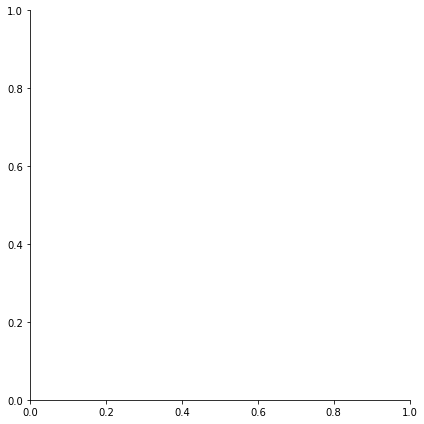

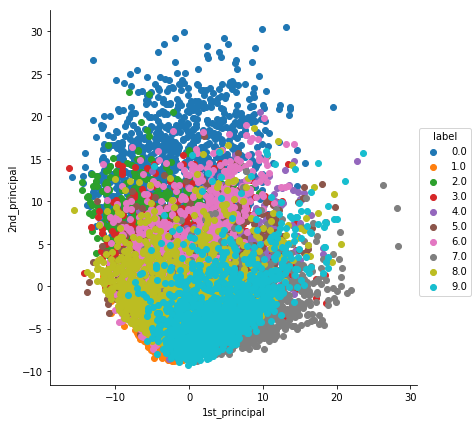

In [53]:
# plotting the 2-d data with seaborn
import seaborn as sns

sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [54]:
#  initializing the PCA

from sklearn import decomposition
pca = decomposition.PCA()

In [55]:
# configuring the parameters
# the number of components is 2 

pca.n_components = 2
pca_data  = pca.fit_transform(sample_data)

# pca reduced will contain the 2-d porjects of sample_data

print("shape of pca_reduced_shape = ", pca_data.shape)

shape of pca_reduced_shape =  (15000, 2)


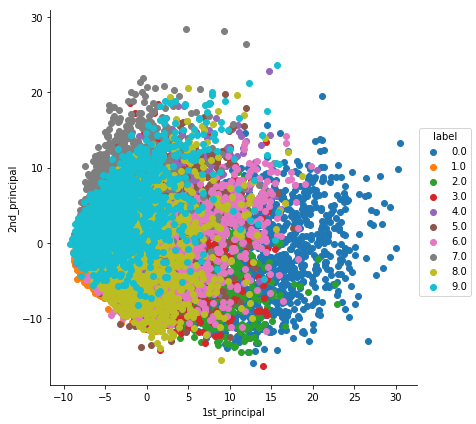

In [56]:
# attaching the labels for each 2-d data point

pca_data = np.vstack((pca_data.T,labels)).T

#creating the new data set which will help us in plotting the result data

pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal','label'))
sns.FacetGrid(pca_df, hue="label",size =6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

# PCA for dimensionality reduction (not for the visualization)

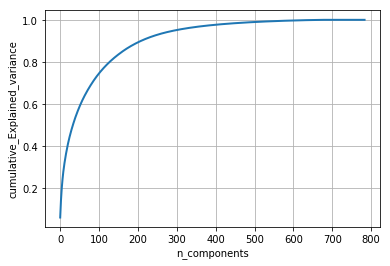

In [57]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)


# plot the pca spectrum

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_Explained_variance')
plt.show()